### Importing necessary libraries and reading the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
activity = pd.read_csv('./data_sets/dailyActivity_merged.csv')
calories = pd.read_csv('./data_sets/dailyCalories_merged.csv')
intensities = pd.read_csv('./data_sets/dailyIntensities_merged.csv')
steps = pd.read_csv('./data_sets/dailySteps_merged.csv')
heartrate = pd.read_csv('./data_sets/heartrate_seconds_merged.csv')
sleep = pd.read_csv('./data_sets/sleepDay_merged.csv')
weight = pd.read_csv('./data_sets/weightLogInfo_merged.csv')

### checking all the  data 

In [3]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
activity.shape

(940, 15)

In [5]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [43]:
activity = activity.drop(columns=['LoggedActivitiesDistance' ,'SedentaryActiveDistance'])

In [13]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [15]:
heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [16]:
heartrate.isna().sum()

Id       0
Time     0
Value    0
dtype: int64

In [17]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [18]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [19]:
sleep.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

### new feature for sleep data "Unactivetime"

In [20]:
sleep['Unactivetime'] = sleep['TotalMinutesAsleep'] + sleep['TotalTimeInBed']
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Unactivetime
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,673
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,791
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,854
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,707
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,1412


In [21]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [22]:
weight.shape

(67, 8)

In [23]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [24]:
weight.isna().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [25]:
weight.groupby('Fat').count()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
Fat,,,,,,,
22.0,1,1,1,1,1,1,1
25.0,1,1,1,1,1,1,1


#### delete Fat feature and make new feature for weight data "Weight_State"

In [26]:
weight = weight.drop(columns=['Fat'])

In [27]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

In [28]:
weight['wieght_state'] = weight['BMI'].apply(categorize_bmi)
weight.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,wieght_state
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000,Normal weight
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000,Normal weight
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000,Obesity
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000,Normal weight
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000,Normal weight


In [29]:
weight.isna().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
wieght_state      0
dtype: int64

# EDA for All Data
##### The dataset is clean, and new features have been added. Let’s explore the data and uncover insights.

In [32]:
all_data = [activity,calories,intensities,steps,heartrate,sleep,weight]

for data in all_data:
    print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

In [36]:
for data in all_data:
    print(data['Id'].nunique())

33
33
33
33
14
24
8


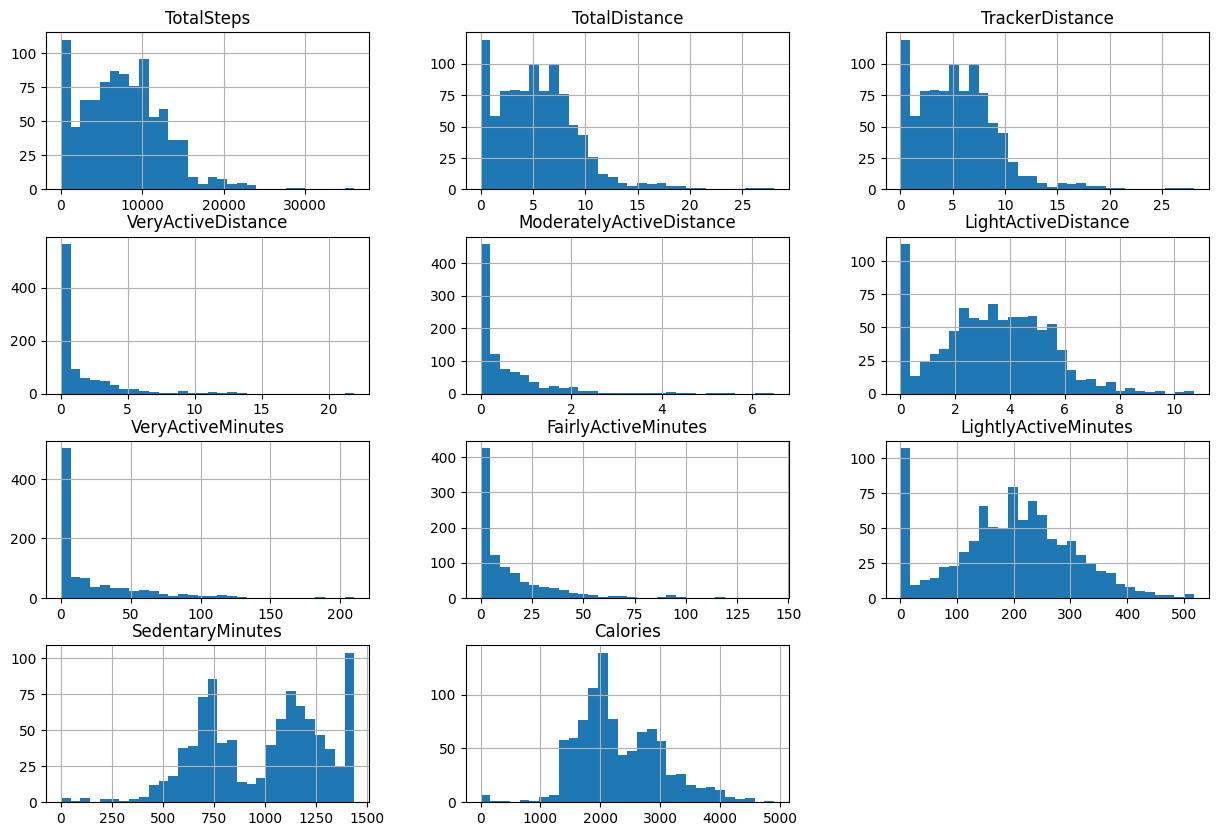

In [45]:
activity[['TotalSteps', 'TotalDistance', 'TrackerDistance',  
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 
     'VeryActiveMinutes', 'FairlyActiveMinutes', 
    'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].hist(bins=30, figsize=(15, 10))
plt.show()


# Optimal Caloric Expenditure

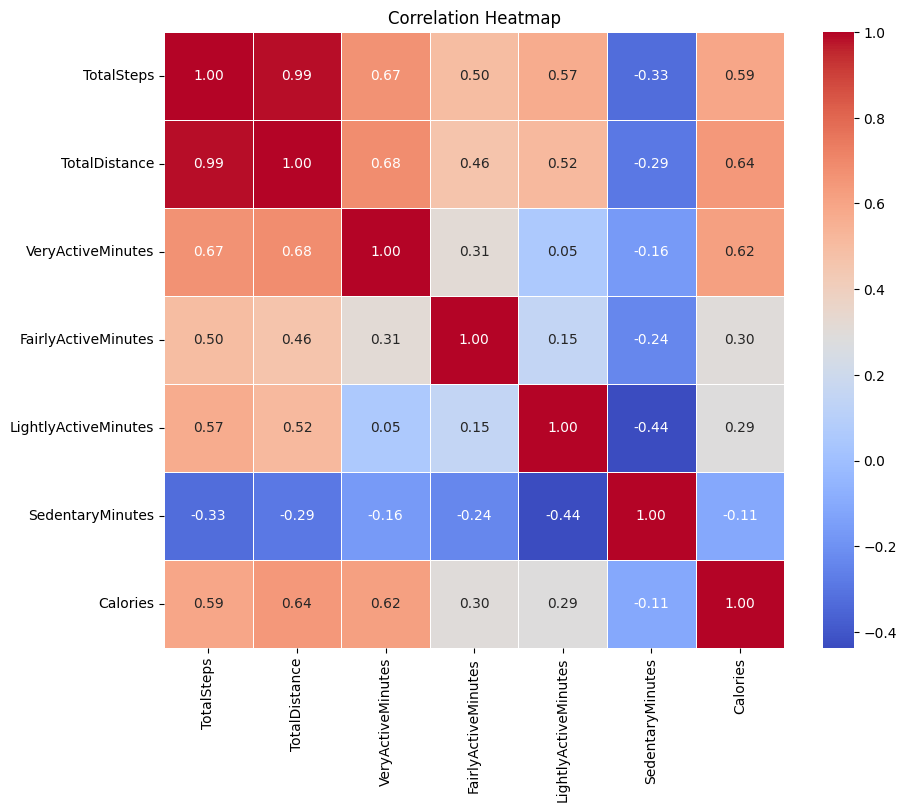

In [47]:
# Compute the correlation matrix
corr_matrix = activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
                  'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


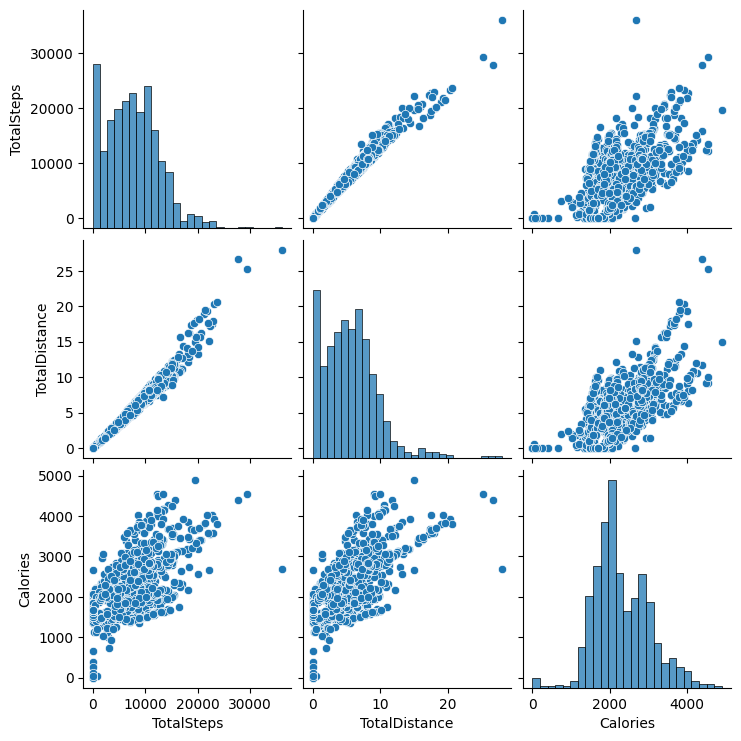

In [62]:
sns.pairplot(activity[['TotalSteps', 'TotalDistance', 'Calories']])
plt.show()

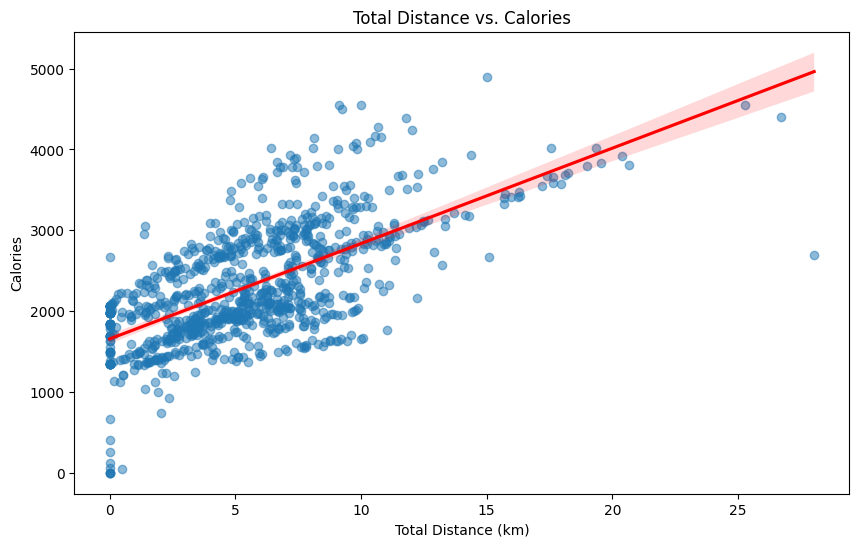

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalDistance', y='Calories', data=activity, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Distance vs. Calories')
plt.xlabel('Total Distance (km)')
plt.ylabel('Calories')
plt.show()

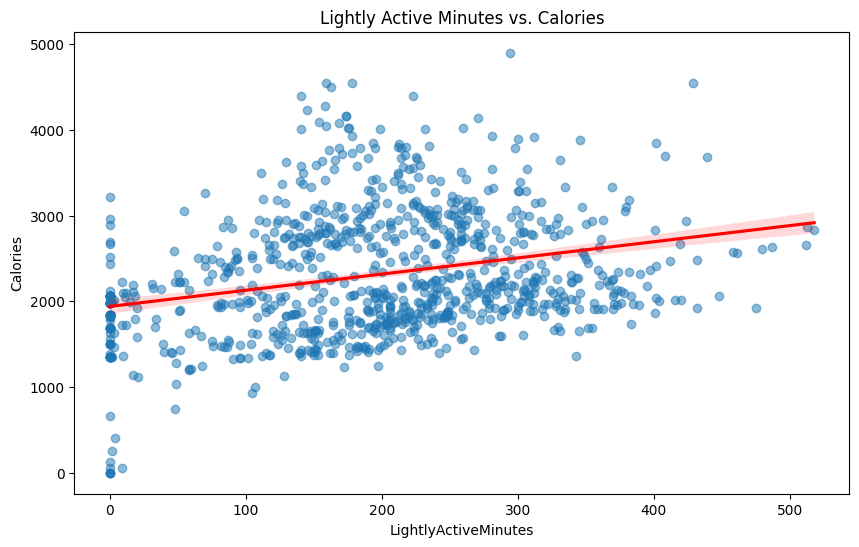

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LightlyActiveMinutes', y='Calories', data=activity, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Lightly Active Minutes vs. Calories')
plt.xlabel('LightlyActiveMinutes')
plt.ylabel('Calories')
plt.show()

### These are people with a high metabolism

<Axes: xlabel='LightlyActiveMinutes'>

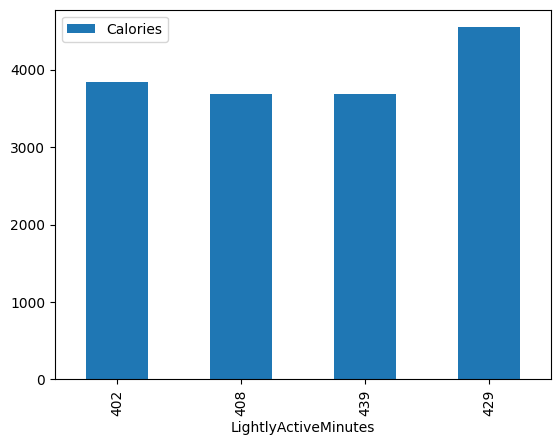

In [61]:
activity.loc[(activity['Calories'] > 3000) & (activity['LightlyActiveMinutes'] > 400)].plot(x='LightlyActiveMinutes' , y= 'Calories' , kind="bar")

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target variable
X = activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']]
y = activity['Calories']

# Initialize the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [68]:

def predict_calories(model, scaler, input_features):

    # Convert input_features to a DataFrame if it's not already
    if not isinstance(input_features, pd.DataFrame):
        input_features = pd.DataFrame(input_features, columns=['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'])
    
    # Scale the input features using the same scaler
    input_features_scaled = scaler.transform(input_features)
    
    # Predict using the trained model
    predictions = model.predict(input_features_scaled)
    
    return predictions


In [71]:
new_data = {
    'TotalSteps': [13162],
    'TotalDistance': [8.500000],
    'VeryActiveMinutes': [25],
    'FairlyActiveMinutes': [13],
    'LightlyActiveMinutes': [328]
}

# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Predict calories
predictions = predict_calories(model, scaler, new_data_df)
print(f'Predicted Calories: {predictions[0]}')


Predicted Calories: 2099.1010666697734


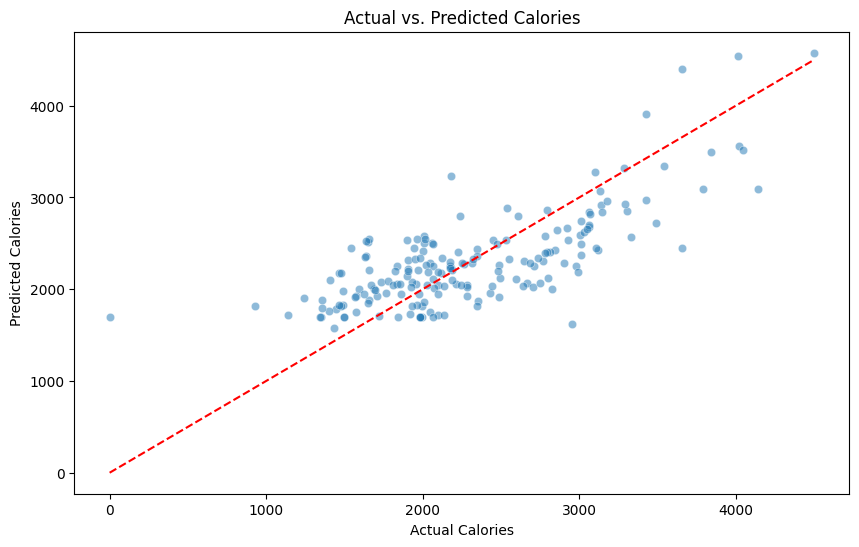

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()


# Impact of Sleep on Activity Metrics

In [76]:
sleep['ActivityDate'] = sleep['SleepDay'].str.split(pat=" 12:00:00 AM").str[0]
sleep = sleep.drop(columns=['SleepDay','TotalSleepRecords'])

In [ ]:
# Merge sleep data
sleep_merged_df = activity.merge(sleep, on=['Id', 'ActivityDate'] , how='inner')

In [116]:
sleep_merged_df = sleep_merged_df.drop(columns=[  'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryMinutes'])

In [118]:
sleep_merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,Unactivetime
0,1503960366,4/12/2016,13162,8.50,25,13,328,1985,327,346,673
1,1503960366,4/13/2016,10735,6.97,21,19,217,1797,384,407,791
2,1503960366,4/15/2016,9762,6.28,29,34,209,1745,412,442,854
3,1503960366,4/16/2016,12669,8.16,36,10,221,1863,340,367,707
4,1503960366,4/17/2016,9705,6.48,38,20,164,1728,700,712,1412


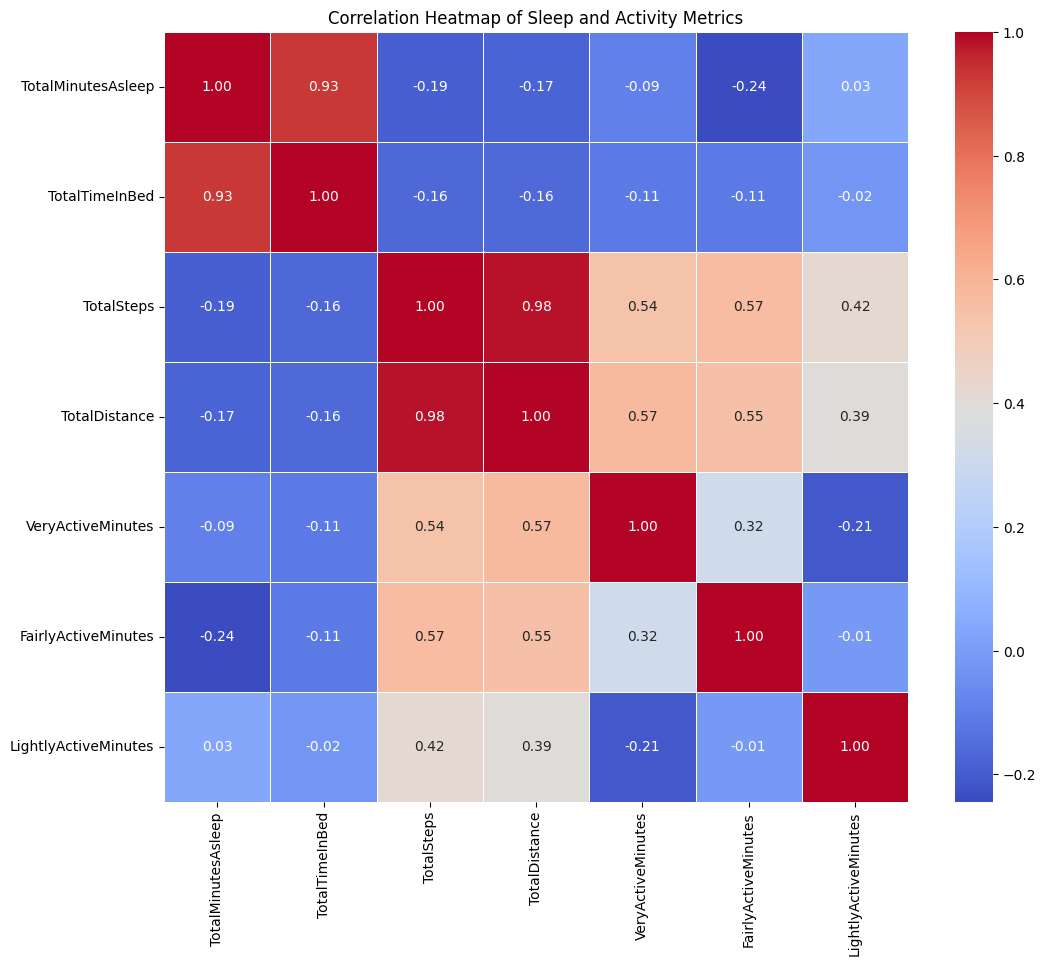

In [95]:
# Assuming df_sleep_activity contains both sleep and activity metrics
# Select relevant columns
sleep_activity_metrics = sleep_merged_df[['TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']]

# Compute the correlation matrix
corr_matrix = sleep_activity_metrics.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sleep and Activity Metrics')
plt.show()


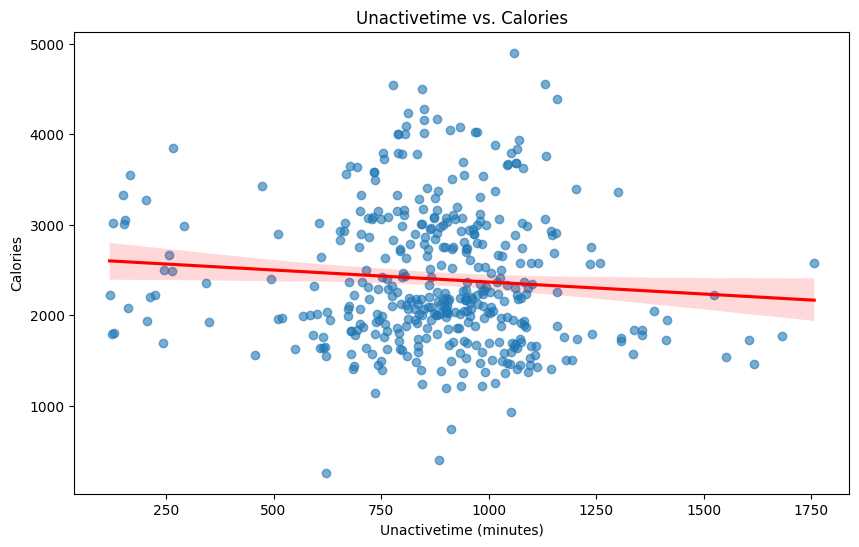

In [97]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Unactivetime', y='Calories', data=sleep_merged_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Unactivetime vs. Calories')
plt.xlabel('Unactivetime (minutes)')
plt.ylabel('Calories')
plt.show()


In [119]:
sleep_merged_df.to_csv('./data_sets/sleep_marged.csv')

# the impact of activity metrics on weight

In [101]:
weight_marged_df = pd.merge(activity,weight , on=['Id','ActivityDate'] , how="inner")


In [103]:
weight_marged_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'Date', 'WeightKg', 'WeightPounds',
       'BMI', 'IsManualReport', 'LogId', 'wieght_state'],
      dtype='object')

In [104]:
weight_marged_df = weight_marged_df.drop(columns=[ 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
        'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes',  'Date',  'WeightPounds',
       'BMI', 'IsManualReport', 'LogId'])

In [105]:
weight_marged_df.shape

(67, 8)

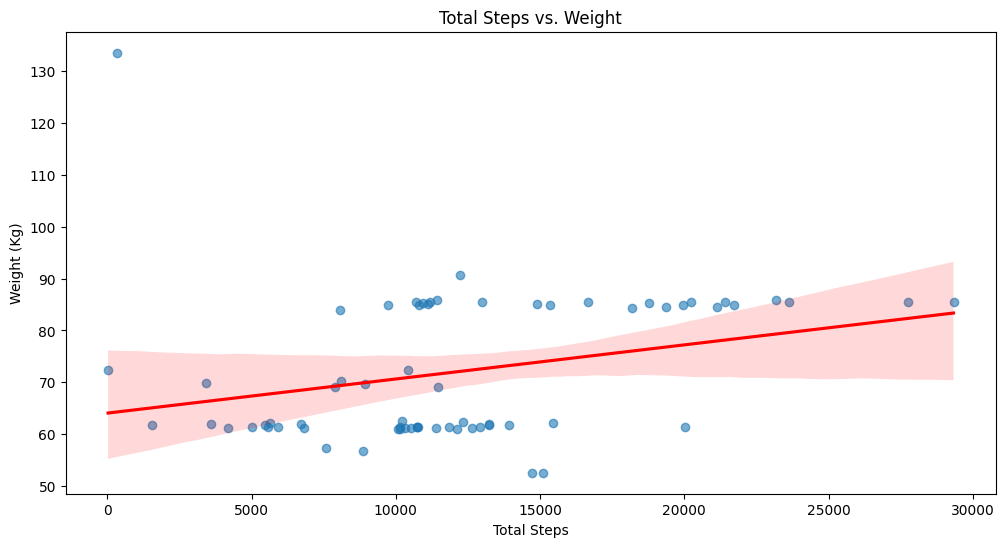

In [112]:
plt.figure(figsize=(12, 6))
sns.regplot(x='TotalSteps', y='WeightKg', data=weight_marged_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Total Steps vs. Weight')
plt.xlabel('Total Steps')
plt.ylabel('Weight (Kg)')
plt.show()


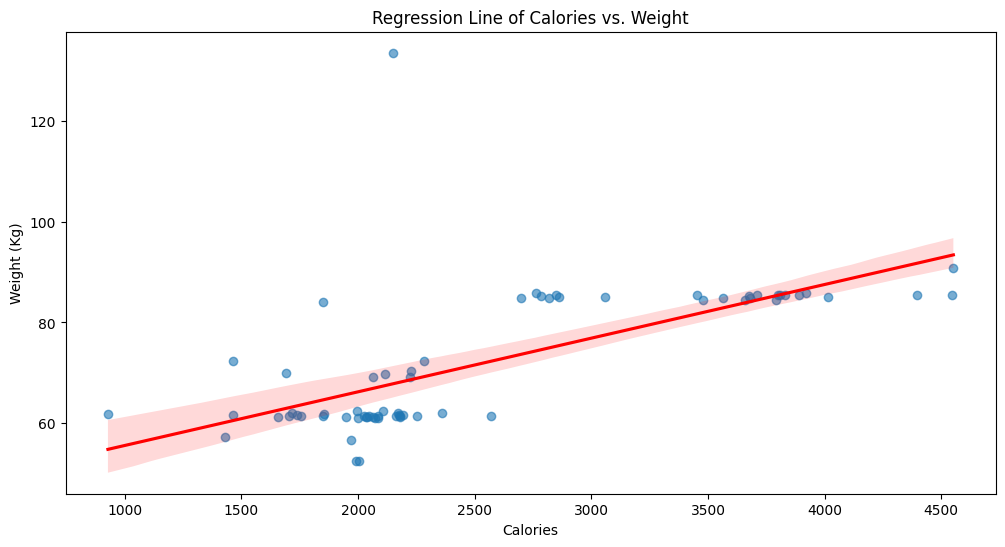

In [111]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Calories', y='WeightKg', data=weight_marged_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(' Calories vs. Weight')
plt.xlabel('Calories')
plt.ylabel('Weight (Kg)')
plt.show()

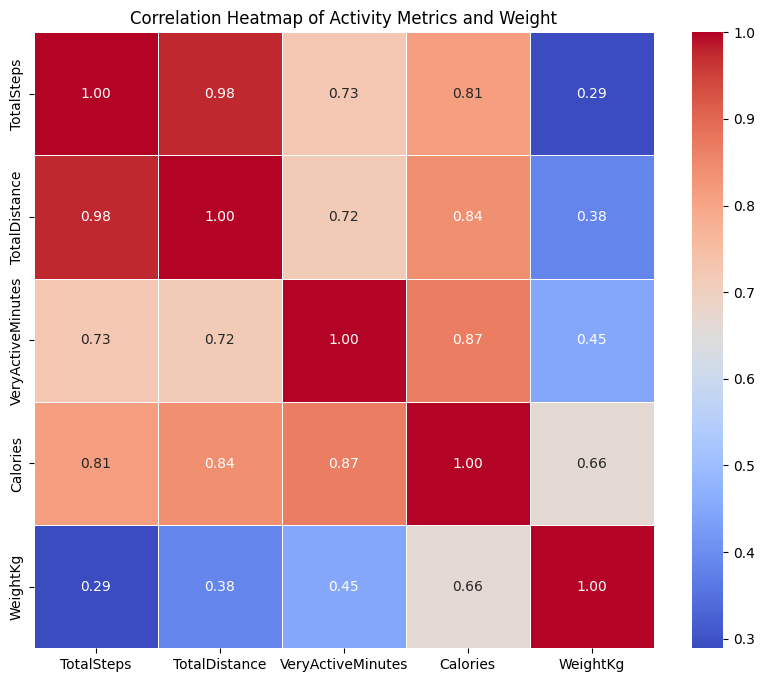

In [114]:
# Compute the correlation matrix
corr_matrix = weight_marged_df[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'Calories', 'WeightKg']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Activity Metrics and Weight')
plt.show()


In [120]:
weight_marged_df.to_csv('./data_sets/weight_marged.csv')

### relations between heart rate and activity matrix in mins

##### merging heartrate data with calories per min and steps per min 

In [123]:
df1 = pd.read_csv("./data_sets/minuteCaloriesNarrow_merged.csv")
df2 = pd.read_csv("./data_sets/minuteStepsNarrow_merged.csv")

In [128]:
heartrate = heartrate.rename(columns={'Time':"ActivityMinute"})

In [129]:
heart_merged_df = pd.merge(heartrate, df1, on=['Id','ActivityMinute'], how='inner')
heart_merged_df = pd.merge(heart_merged_df, df2, on=['Id','ActivityMinute'], how='inner')


In [130]:
heart_merged_df.head()

,Id,ActivityMinute,Value,Calories,Steps
0,2022484408,4/12/2016 7:21:00 AM,97,3.32064,17
1,2022484408,4/12/2016 7:23:00 AM,60,1.34901,0
2,2022484408,4/12/2016 7:24:00 AM,58,1.03770,0
3,2022484408,4/12/2016 7:26:00 AM,53,2.49048,7
4,2022484408,4/12/2016 7:27:00 AM,53,1.03770,0


In [131]:
heart_merged_df.shape

(200073, 5)

In [132]:
heart_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200073 entries, 0 to 200072
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              200073 non-null  int64  
 1   ActivityMinute  200073 non-null  object 
 2   Value           200073 non-null  int64  
 3   Calories        200073 non-null  float64
 4   Steps           200073 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.6+ MB


In [133]:
heart_merged_df.isna().sum()

Id                0
ActivityMinute    0
Value             0
Calories          0
Steps             0
dtype: int64

In [134]:
heart_merged_df.describe()

,Id,Value,Calories,Steps
count,2.000730e+05,200073.000000,200073.000000,200073.000000
mean,5.416297e+09,73.824809,2.025065,9.502302
std,1.815188e+09,16.795436,1.824332,22.895846
min,2.022484e+09,38.000000,0.775100,0.000000
25%,4.388162e+09,62.000000,1.018820,0.000000
50%,5.553957e+09,70.000000,1.264600,0.000000
75%,6.962181e+09,83.000000,2.413060,6.000000
max,8.877689e+09,203.000000,19.255600,207.000000


In [135]:
heart_merged_df.columns

Index(['Id', 'ActivityMinute', 'Value', 'Calories', 'Steps'], dtype='object')

#### Heart Rate and Caloric Expenditure



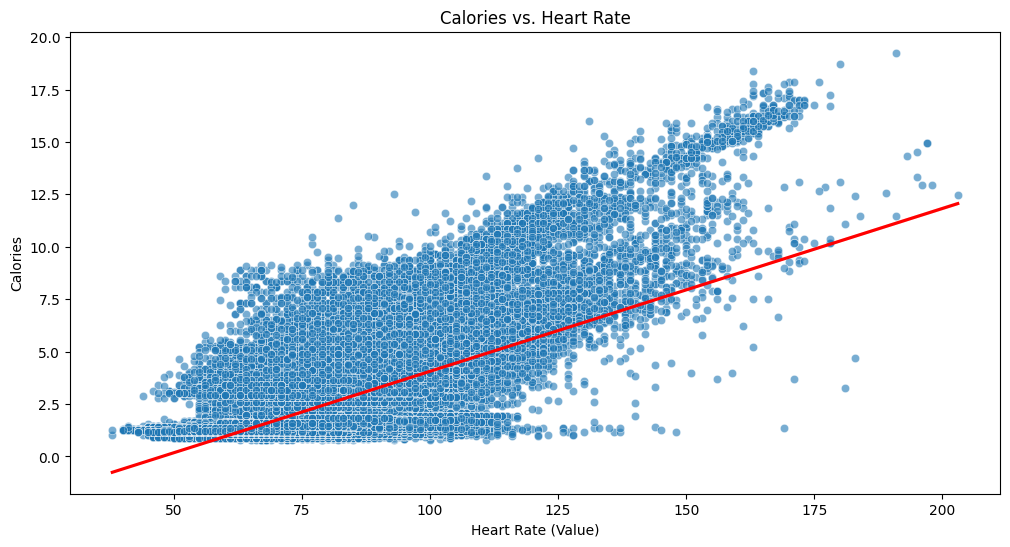

In [136]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Value', y='Calories', data=heart_merged_df, alpha=0.6)
sns.regplot(x='Value', y='Calories', data=heart_merged_df, scatter=False, color='red')
plt.title('Calories vs. Heart Rate')
plt.xlabel('Heart Rate (Value)')
plt.ylabel('Calories')
plt.show()

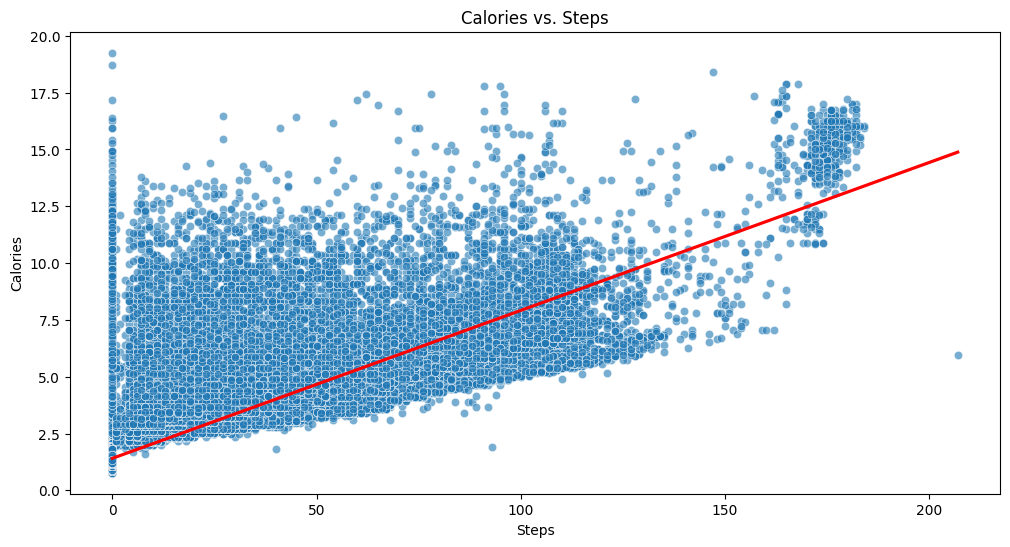

In [137]:
# Scatter plot of Calories vs. Steps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Steps', y='Calories', data=heart_merged_df, alpha=0.6)
sns.regplot(x='Steps', y='Calories', data=heart_merged_df, scatter=False, color='red')
plt.title('Calories vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

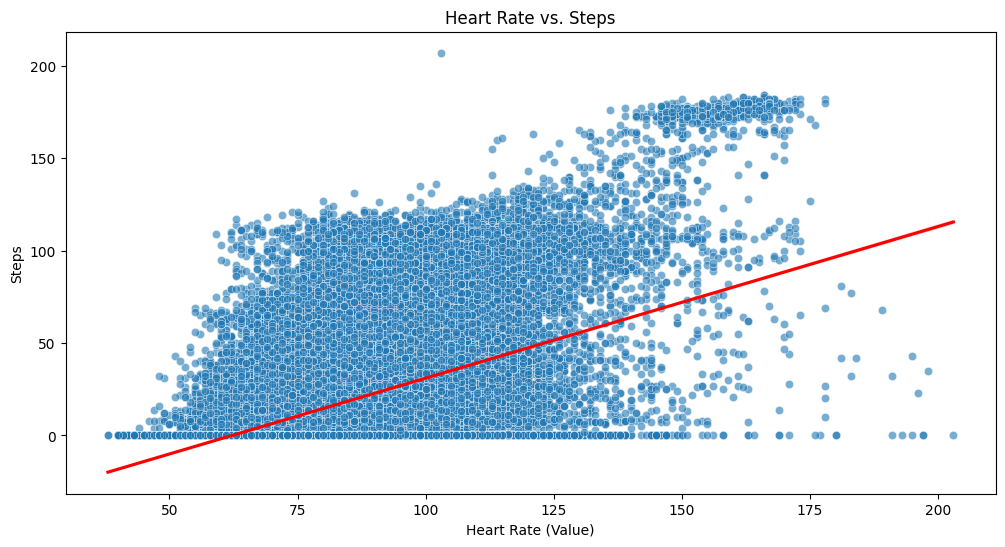

In [139]:
# Scatter plot of Heart Rate vs. Steps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Value', y='Steps', data=heart_merged_df, alpha=0.6)
sns.regplot(x='Value', y='Steps', data=heart_merged_df, scatter=False, color='red')
plt.title('Heart Rate vs. Steps')
plt.xlabel('Heart Rate (Value)')
plt.ylabel('Steps')
plt.show()

#### Impact of Heart Rate on Caloric Burn Across Activity Levels



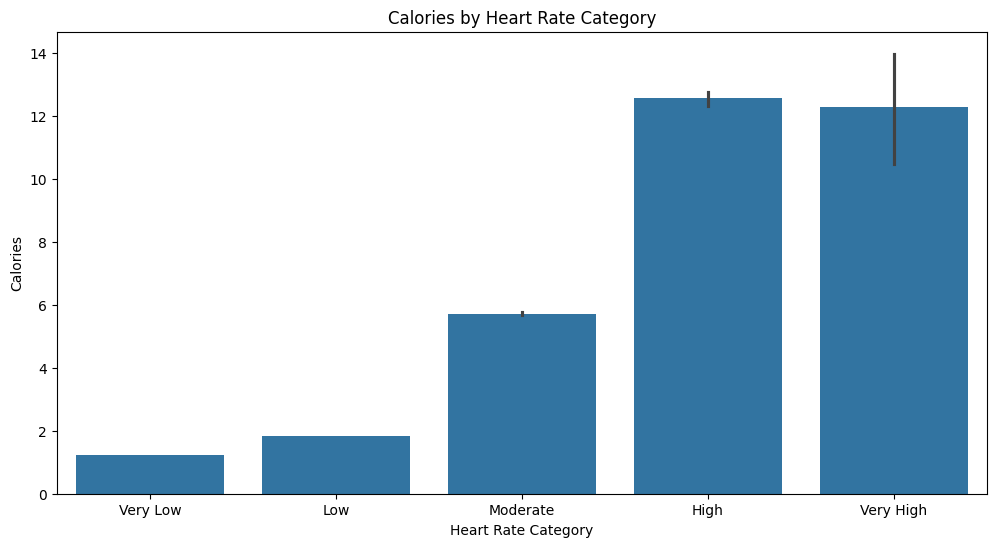

In [142]:
# Create categories for Heart Rate
heart_merged_df['HeartRateCategory'] = pd.cut(heart_merged_df['Value'], bins=[0, 60, 100, 140, 180, heart_merged_df['Value'].max()], 
                                 labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Box plot of Calories by Heart Rate Category
plt.figure(figsize=(12, 6))
sns.barplot(x='HeartRateCategory', y='Calories', data=heart_merged_df)
plt.title('Calories by Heart Rate Category')
plt.xlabel('Heart Rate Category')
plt.ylabel('Calories')
plt.show()


In [144]:
# Find the user with the maximum and minimum calories burned
max_calories_user = heart_merged_df.groupby('Id')['Calories'].sum().idxmax()
min_calories_user = heart_merged_df.groupby('Id')['Calories'].sum().idxmin()

print(f"User with maximum calories burned: {max_calories_user}")
print(f"User with minimum calories burned: {min_calories_user}")


User with maximum calories burned: 4388161847
User with minimum calories burned: 2026352035


In [146]:
# Filter the data for the user with the maximum calories burned
df_max_calories = heart_merged_df[heart_merged_df['Id'] == max_calories_user]

# Filter the data for the user with the minimum calories burned
df_min_calories = heart_merged_df[heart_merged_df['Id'] == min_calories_user]


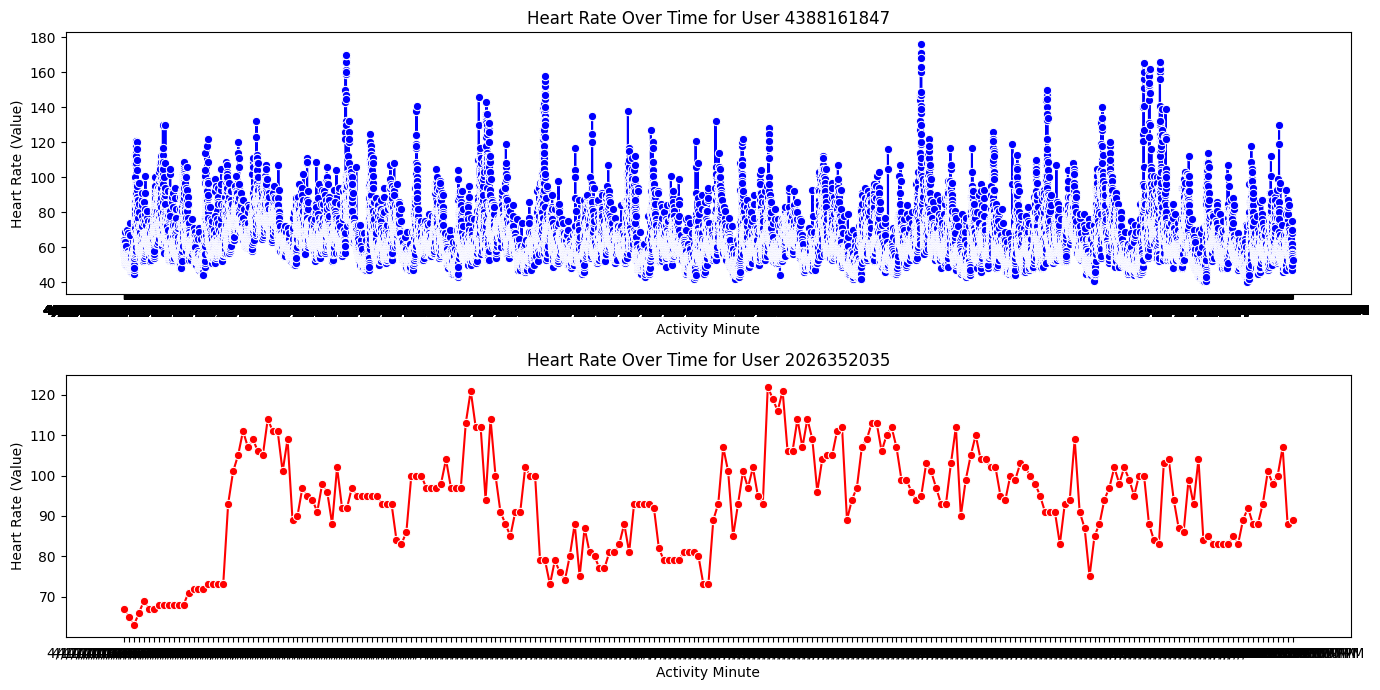

In [147]:
# Set up the plotting area
plt.figure(figsize=(14, 7))

# Plot for the user with maximum calories burned
plt.subplot(2, 1, 1)
sns.lineplot(x='ActivityMinute', y='Value', data=df_max_calories, marker='o', color='blue')
plt.title(f'Heart Rate Over Time for User {max_calories_user}')
plt.xlabel('Activity Minute')
plt.ylabel('Heart Rate (Value)')

# Plot for the user with minimum calories burned
plt.subplot(2, 1, 2)
sns.lineplot(x='ActivityMinute', y='Value', data=df_min_calories, marker='o', color='red')
plt.title(f'Heart Rate Over Time for User {min_calories_user}')
plt.xlabel('Activity Minute')
plt.ylabel('Heart Rate (Value)')

# Adjust layout
plt.tight_layout()
plt.show()


In [148]:
heart_merged_df.to_csv('./data_sets/heart_merged.csv')